In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
print("Loading model and scaler from Week 2...")

# Define the path to our Week 2 folder
week_2_folder = '../Week 2/'

# Load the model
model = joblib.load(week_2_folder + 'model_price_forecast.joblib')

# Load the scaler
scaler = joblib.load(week_2_folder + 'scaler.joblib')

print("Model and scaler loaded.")

# --- Load the Data ---
print("Loading processed data from Week 2...")
df_processed = pd.read_csv(week_2_folder + 'processed_dataset.csv', 
                           index_col='timestamp', 
                           parse_dates=True)

print("Data loaded. We will use this for our simulation.")
df_processed.head()

Loading model and scaler from Week 2...
Model and scaler loaded.
Loading processed data from Week 2...
Data loaded. We will use this for our simulation.


,generation_biomass,generation_lignite_coal,generation_coal_gas,generation_natural_gas,generation_hard_coal,generation_oil,generation_oil_shale,generation_peat,generation_geothermal,generation_hydro_pump_used,...,load_forecast,load_actual,price_forecast,price_actual,hour,day_of_week,month,quarter,day_of_year,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447,329,0,4844,4821,162,0,0,0,863,...,26118,25385,50.10,65.41,23,2,12,4,365,2014
2015-01-01 00:00:00+00:00,449,328,0,5196,4755,158,0,0,0,920,...,24934,24382,48.10,64.92,0,3,1,1,1,2015
2015-01-01 01:00:00+00:00,448,323,0,4857,4581,157,0,0,0,1164,...,23515,22734,47.33,64.48,1,3,1,1,1,2015
2015-01-01 02:00:00+00:00,438,254,0,4314,4131,160,0,0,0,1503,...,22642,21286,42.27,59.32,2,3,1,1,1,2015
2015-01-01 03:00:00+00:00,428,187,0,4130,3840,156,0,0,0,1826,...,21785,20264,38.41,56.04,3,3,1,1,1,2015


In [3]:
# --- 1. Separate Features (X) and Target (y) ---
TARGET = 'price_actual'
FEATURES = [col for col in df_processed.columns if col != TARGET]

# --- 2. Split into Train and Test (the exact same way as Week 2) ---
split_date = '2018-01-01'
df_train = df_processed.loc[df_processed.index < split_date]
df_test = df_processed.loc[df_processed.index >= split_date]

# --- 3. Scale our Features ---
# We ONLY use the test set for this simulation
X_test_scaled = scaler.transform(df_test[FEATURES])
y_test_actuals = df_test[TARGET] # The real-world prices

print(f"We will simulate on {len(df_test)} hours of test data (all of 2018).")

We will simulate on 8759 hours of test data (all of 2018).


In [4]:
print("Making price predictions on the test data...")

# Use our loaded model to predict
price_predictions = model.predict(X_test_scaled)

# --- Store all our data in one new DataFrame ---
# This makes it easy to work with
df_sim = pd.DataFrame(index=y_test_actuals.index)
df_sim['price_actual'] = y_test_actuals
df_sim['price_prediction'] = price_predictions

print("Predictions are ready.")
df_sim.head()

Making price predictions on the test data...
Predictions are ready.


,price_actual,price_prediction
timestamp,,
2018-01-01 00:00:00+00:00,19.02,37.090389
2018-01-01 01:00:00+00:00,17.90,37.090389
2018-01-01 02:00:00+00:00,20.88,37.090389
2018-01-01 03:00:00+00:00,18.83,37.090389
2018-01-01 04:00:00+00:00,15.80,37.090389


In [5]:
# --- Battery & Trading Parameters ---
BATTERY_CAPACITY_MWH = 100  # Total size of our battery (Megawatt-hours)
BATTERY_CHARGE_RATE_MW = 25 # Max power it can charge/discharge at (Megawatts)
BATTERY_EFFICIENCY = 0.90   # 90% efficient (we lose 10% when charging)
BATTERY_STARTING_SOC = 50   # Start the battery at 50% full (SOC = State of Charge)

print(f"Simulation Parameters Set:")
print(f"  Battery Size: {BATTERY_CAPACITY_MWH} MWh")
print(f"  Max Charge/Discharge: {BATTERY_CHARGE_RATE_MW} MW")
print(f"  Efficiency: {BATTERY_EFFICIENCY * 100}%")

Simulation Parameters Set:
  Battery Size: 100 MWh
  Max Charge/Discharge: 25 MW
  Efficiency: 90.0%


In [6]:
print("Running the Arbitrage Simulation...")

# --- 1. Define our Buy/Sell strategy ---
# We'll buy if the predicted price is in the bottom 25% of all prices
# We'll sell if the predicted price is in the top 25%
buy_threshold = df_sim['price_prediction'].quantile(0.25)
sell_threshold = df_sim['price_prediction'].quantile(0.75)

print(f"Strategy: Buy if predicted price < {buy_threshold:.2f} EUR")
print(f"Strategy: Sell if predicted price > {sell_threshold:.2f} EUR")

# --- 2. Create lists to store the results ---
battery_soc_history = []
profit_history = []
action_history = []

# Get our starting state
current_battery_soc = BATTERY_STARTING_SOC

# --- 3. Loop through every hour in our 2018 simulation data ---
for i in range(len(df_sim)):
    
    # Get the PREDICTED price and the ACTUAL price for this hour
    predicted_price = df_sim['price_prediction'].iloc[i]
    actual_price = df_sim['price_actual'].iloc[i]
    
    # --- This is the TRADER'S DECISION LOGIC ---
    
    # CASE 1: Predicted price is LOW -> BUY
    if predicted_price < buy_threshold:
        action = 'BUY'
        # How much *can* we charge? (Don't go over 100%)
        available_capacity = BATTERY_CAPACITY_MWH - current_battery_soc
        power_to_charge = min(BATTERY_CHARGE_RATE_MW, available_capacity / BATTERY_EFFICIENCY)
        
        # We can't charge more than the max rate
        power_to_charge = min(power_to_charge, BATTERY_CHARGE_RATE_MW)
        
        # Update battery (we lose 10% to heat)
        current_battery_soc += (power_to_charge * BATTERY_EFFICIENCY)
        
        # Calculate COST (money flows out)
        profit = - (power_to_charge * actual_price)
    
    # CASE 2: Predicted price is HIGH -> SELL
    elif predicted_price > sell_threshold:
        action = 'SELL'
        # How much *can* we discharge? (Don't go below 0%)
        available_energy = current_battery_soc
        power_to_discharge = min(BATTERY_CHARGE_RATE_MW, available_energy)
        
        # We can't discharge more than the max rate
        power_to_discharge = min(power_to_discharge, BATTERY_CHARGE_RATE_MW)
        
        # Update battery
        current_battery_soc -= power_to_discharge
        
        # Calculate PROFIT (money flows in)
        profit = power_to_discharge * actual_price
        
    # CASE 3: Price is in the middle -> HOLD
    else:
        action = 'HOLD'
        profit = 0
        # No change to battery

    # Store our results
    battery_soc_history.append(current_battery_soc)
    profit_history.append(profit)
    action_history.append(action)

# Add our simulation results back to the DataFrame
df_sim['battery_soc'] = battery_soc_history
df_sim['action'] = action_history
df_sim['profit'] = profit_history
df_sim['cumulative_profit'] = df_sim['profit'].cumsum()

print("✅ Simulation complete!")
df_sim.head()

Running the Arbitrage Simulation...
Strategy: Buy if predicted price < 56.00 EUR
Strategy: Sell if predicted price > 65.55 EUR
✅ Simulation complete!


,price_actual,price_prediction,battery_soc,action,profit,cumulative_profit
timestamp,,,,,,
2018-01-01 00:00:00+00:00,19.02,37.090389,72.5,BUY,-475.5,-475.5
2018-01-01 01:00:00+00:00,17.90,37.090389,95.0,BUY,-447.5,-923.0
2018-01-01 02:00:00+00:00,20.88,37.090389,100.0,BUY,-116.0,-1039.0
2018-01-01 03:00:00+00:00,18.83,37.090389,100.0,BUY,-0.0,-1039.0
2018-01-01 04:00:00+00:00,15.80,37.090389,100.0,BUY,-0.0,-1039.0


--- 📈 SIMULATION RESULTS 📈 ---


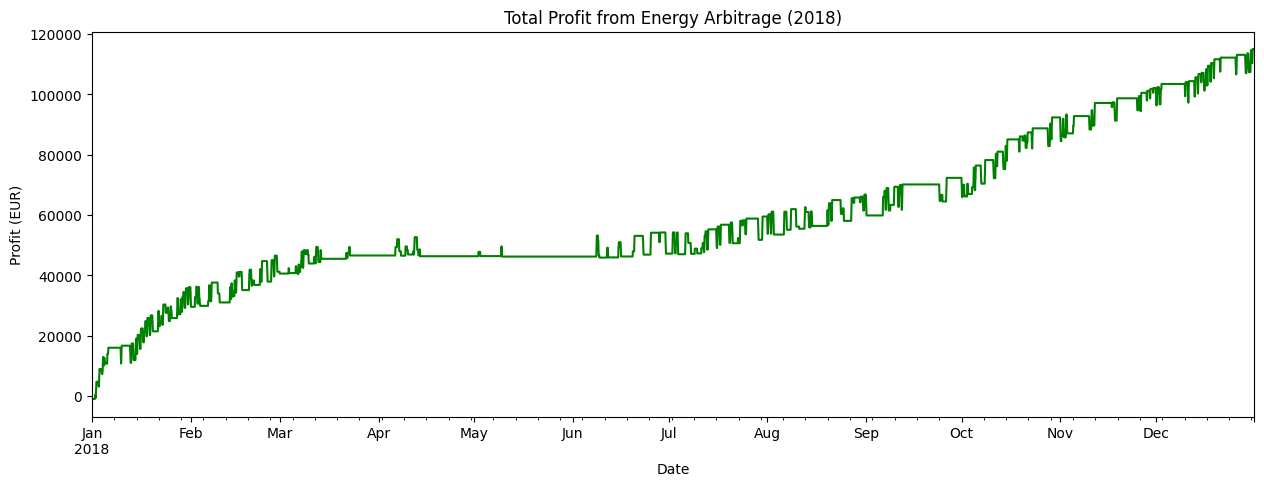

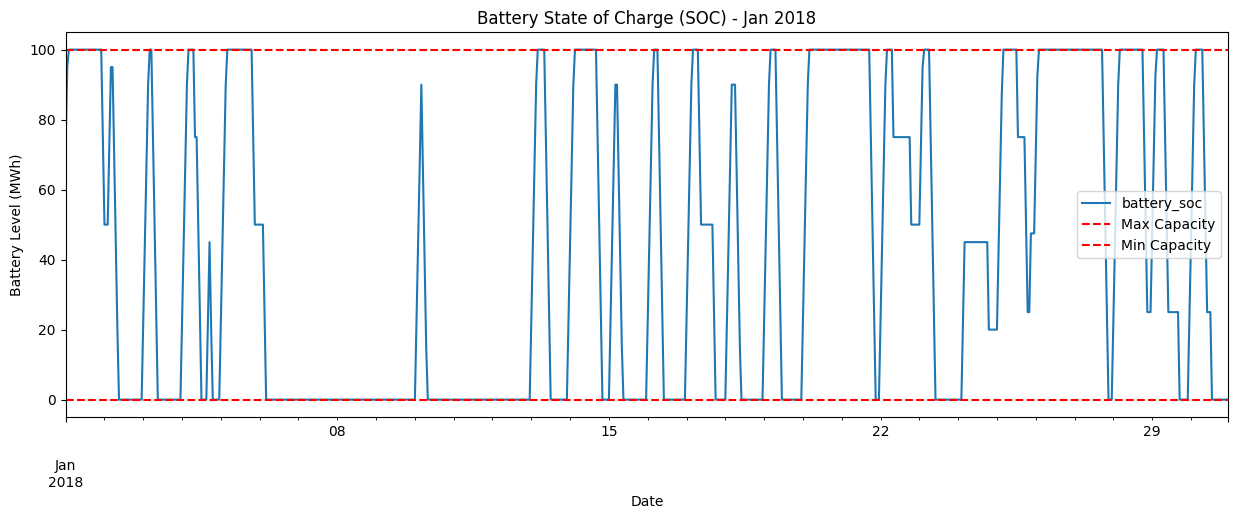

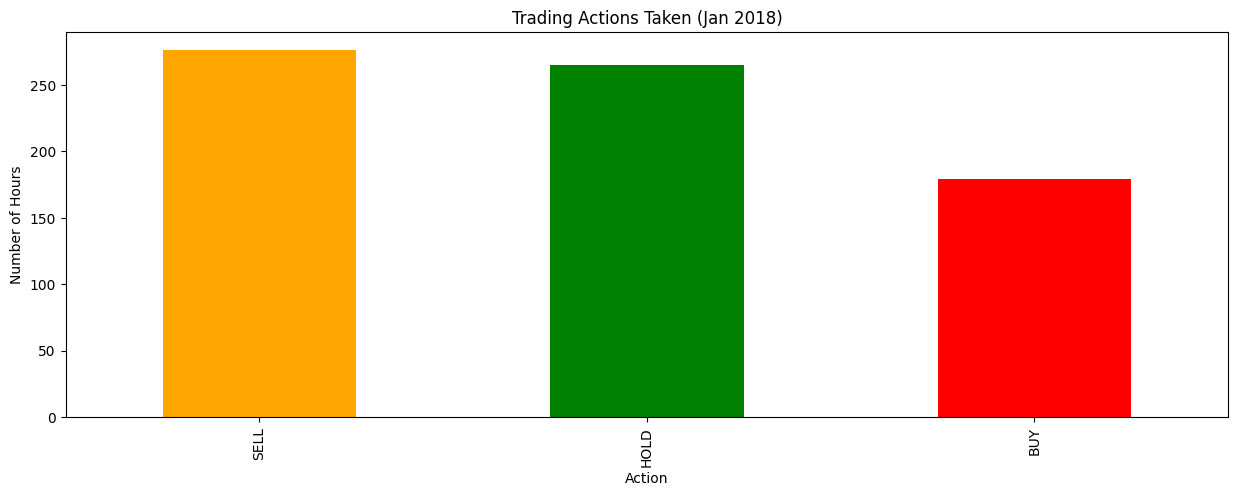


--- Final Performance Metrics (Full Year 2018) ---
Total Profit from Arbitrage: 115,037.40 EUR
Total 'Buy' actions taken: 2185 hours
Total 'Sell' actions taken: 2188 hours

Our 'Smart Trader' successfully used the AI model to make a profit!


In [7]:
print("--- 📈 SIMULATION RESULTS 📈 ---")

# --- Plot 1: Cumulative Profit ---
plt.figure(figsize=(15, 5))
df_sim['cumulative_profit'].plot(color='green')
plt.title('Total Profit from Energy Arbitrage (2018)')
plt.ylabel('Profit (EUR)')
plt.xlabel('Date')
plt.savefig('week_3_total_profit.png') # Save the plot for our PPT
plt.show()

# --- Plot 2: Battery State of Charge (for one month) ---
plt.figure(figsize=(15, 5))
# Plot just the first month (Jan 2018) so we can see the detail
df_sim['battery_soc'].iloc[:720].plot()
plt.title('Battery State of Charge (SOC) - Jan 2018')
plt.ylabel('Battery Level (MWh)')
plt.xlabel('Date')
plt.axhline(BATTERY_CAPACITY_MWH, color='red', linestyle='--', label='Max Capacity')
plt.axhline(0, color='red', linestyle='--', label='Min Capacity')
plt.legend()
plt.savefig('week_3_battery_soc.png') # Save the plot for our PPT
plt.show()

# --- Plot 3: Actions Taken (for one month) ---
plt.figure(figsize=(15, 5))
df_sim['action'].iloc[:720].value_counts().plot(kind='bar', color=['orange', 'green', 'red'])
plt.title('Trading Actions Taken (Jan 2018)')
plt.ylabel('Number of Hours')
plt.xlabel('Action')
plt.savefig('week_3_action_histogram.png') # Save the plot for our PPT
plt.show()

# --- Final Metrics ---
total_profit = df_sim['profit'].sum()
total_buys = df_sim[df_sim['action'] == 'BUY'].shape[0]
total_sells = df_sim[df_sim['action'] == 'SELL'].shape[0]

print("\n--- Final Performance Metrics (Full Year 2018) ---")
print(f"Total Profit from Arbitrage: {total_profit:,.2f} EUR")
print(f"Total 'Buy' actions taken: {total_buys} hours")
print(f"Total 'Sell' actions taken: {total_sells} hours")

print("\nOur 'Smart Trader' successfully used the AI model to make a profit!")